In [37]:
# Importing Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import csv 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.metrics import accuracy_score  #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Loading the Data 
Data = pd.read_csv("/home/ratnam/Work/Tempus/DScasestudy_1.txt", sep="\t")

In [3]:
# Data Info 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Columns: 16563 entries, response to V16562
dtypes: int64(16563)
memory usage: 67.0 MB


In [4]:
# Data Representation s
Data.head(2)

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Checking the Distribution of the Response Variable 
Data.groupby('response')['response'].count() 

response
0    407
1    123
Name: response, dtype: int64

In [6]:
# Data Describe 
Data.describe()

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
count,530.000000,530.000000,530.000000,530.000000,530.0,530.000000,530.0,530.000000,530.000000,530.0,...,530.000000,530.0,530.0,530.000000,530.000000,530.000000,530.0,530.000000,530.0,530.000000
mean,0.232075,0.009434,0.009434,0.001887,0.0,0.020755,1.0,0.001887,0.030189,0.0,...,0.158491,0.0,0.0,0.001887,0.020755,0.013208,0.0,0.003774,0.0,0.447170
std,0.422556,0.096761,0.096761,0.043437,0.0,0.142697,0.0,0.043437,0.171268,0.0,...,0.365545,0.0,0.0,0.043437,0.142697,0.114270,0.0,0.061371,0.0,0.497671
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.0,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


In [7]:
# Checking the Shape of the Data 
Data.shape

(530, 16563)

In [8]:
# Checking the Dimentions of the Data 
Data.ndim

2

In [9]:
# Checking the Null Values in the Python 
Data.isnull().values.any()

False

In [10]:
# Selecting the COlumns wich have Constant Value 
# For Example V1 has value '0' only then remove such columns 
Data_check = Data.describe().transpose().reset_index()
Remove_Vartiables = Data_check['index'][Data_check['min'] == Data_check['max']].reset_index()

In [11]:
# Dropping the Columns 
Data = Data.drop(columns=Remove_Vartiables['index'])

In [12]:
Data.head(2)

,response,V1,V2,V3,V5,V7,V8,V11,V13,V17,...,V16549,V16550,V16551,V16552,V16553,V16556,V16557,V16558,V16560,V16562
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# All values are Integer 
Data.dtypes.nunique()

1

In [14]:
Data.describe()

,response,V1,V2,V3,V5,V7,V8,V11,V13,V17,...,V16549,V16550,V16551,V16552,V16553,V16556,V16557,V16558,V16560,V16562
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,...,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,0.232075,0.009434,0.009434,0.001887,0.020755,0.001887,0.030189,0.009434,0.130189,0.416981,...,0.666038,0.013208,0.003774,0.022642,0.158491,0.001887,0.020755,0.013208,0.003774,0.447170
std,0.422556,0.096761,0.096761,0.043437,0.142697,0.043437,0.171268,0.096761,0.336829,0.493526,...,0.472072,0.114270,0.061371,0.148898,0.365545,0.043437,0.142697,0.114270,0.061371,0.497671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([407.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 123.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

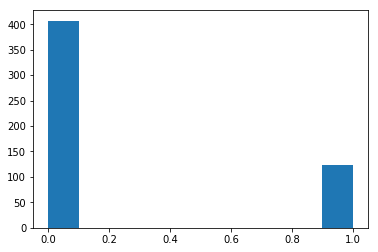

In [15]:
%matplotlib inline
plt.hist(Data['response'])

In [16]:
# Checking the Shape of the Data 
Data.shape

(530, 10894)

In [17]:
Data.head(2)

,response,V1,V2,V3,V5,V7,V8,V11,V13,V17,...,V16549,V16550,V16551,V16552,V16553,V16556,V16557,V16558,V16560,V16562
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [18]:
Y = Data['response']
X = Data.loc[:, Data.columns != 'response']

In [64]:
# Split the data into training and test sets (30% held out for testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
# Balancing  the Unbalanced Data 
# Balancing  the Unbalanced Data 
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.sample(X_train, y_train)

In [65]:
pd.DataFrame(y_train_res,columns=['X']).groupby('X')['X'].count()

X
0    333
1    333
Name: X, dtype: int64

In [66]:
# Transforming Train Data 
pca = PCA(n_components=90,random_state=100)
pca_model = pca.fit(X_resampled)
New_data = pca.transform(X_resampled)
PCA_Dataframe_X = pd.DataFrame(New_data)
#PCA_Dataframe_X.columns=['A','B','C','D','E']
# Trnasforming Test with pCA 
XOS_test = pca.transform(X_test)
XOS_test_final = pd.DataFrame(XOS_test)

In [67]:
# Transforming Train Data 
New_data = pca.transform(x_train_res)
PCA_Dataframe_X = pd.DataFrame(New_data)
# Trnasforming Test with pCA 
X_test = pca.transform(X_test)
X_test_final = pd.DataFrame(X_test)

In [68]:
PCA_Dataframe_X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,6.132659,2.461131,-6.252204,-3.611051,2.687767,-0.914402,-1.608406,-7.652789,-1.273020,-1.582256,...,1.158796,2.988985,1.986913,-5.296134,0.106527,0.244024,-0.541145,-0.833506,-1.450838,0.432450
1,-8.419878,3.761477,2.673144,-0.822151,-0.330035,3.395655,-0.619674,2.844307,-1.482058,1.289793,...,0.065407,-1.227233,-0.101285,-0.896684,-0.751422,1.588580,0.478440,-0.255214,0.419622,-1.409642


In [69]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

KNN: 0.740154 (0.136444)
CART: 0.799877 (0.104555)
GBBosst: 0.942014 (0.059041)
NB: 0.814346 (0.101921)
SVM: 0.987273 (0.022628)


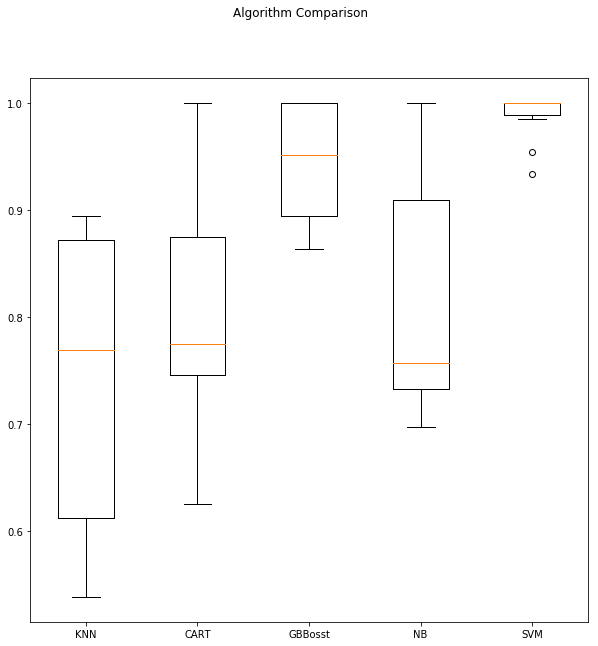

In [70]:
seed = 200
# prepare models
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GBBosst', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model,PCA_Dataframe_X , y_resampled, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [71]:
# Model Training and Model Testing with Default parameters 
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(PCA_Dataframe_X,y_train_res)
predictors=list(PCA_Dataframe_X)
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test_final, y_test)))
pred=baseline.predict(X_test_final)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.717
             precision    recall  f1-score   support

          0       0.72      0.99      0.83        74
          1       0.75      0.09      0.17        32

avg / total       0.73      0.72      0.63       106



In [72]:
# Using the Tuned Parameters 
model1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(PCA_Dataframe_X,y_train_res)
predictors=list(PCA_Dataframe_X)
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test_final)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.726
             precision    recall  f1-score   support

          0       0.72      0.99      0.83        74
          1       0.80      0.12      0.22        32

avg / total       0.75      0.73      0.65       106



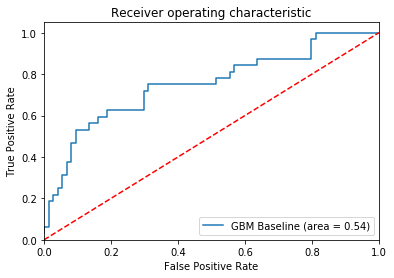

In [73]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 


#run models
model1.fit(X_train,y_train)
#calculate values for ROC AUC plot
#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])



plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [ ]:
# Balancing  the Unbalanced Data 
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)